# Using Custom Callback function with Keras

You can use history callback function or tensorboard in basic model monitoring. But, if you monitor another model like Recurrent Neural Network, you would not monitor properly because RNN call **fit function**  many times. Let me give you a example.

In [ ]:
for epoch in range(1000):
    print("Epochs : " + str(epoch))
    hist = model.fit(x_train, y_train, epochs = 1, batch_size = 1, verbose = 2, shuffle=False)
    model.reset_states()

In above code, You can not observe the trend by every epoch because in every epoch, new history object replaces existing object. Accordingly, You need to `define custom callback function in order to maintain the existing learning state.`
Let me give you a example.

In [1]:
import keras
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np

np.random.seed(3)

Using TensorFlow backend.


### Define custom callback function

In [2]:
class CustomHistory(keras.callbacks.Callback):
    def init(self):
        self.train_loss = []
        self.val_loss = []
        self.train_acc = []
        self.val_acc = []
        
    def on_epoch_end(self, batch, logs={}):
        self.train_loss.append(logs.get('loss'))
        self.val_loss.append(logs.get('val_loss'))
        self.train_acc.append(logs.get('acc'))
        self.val_acc.append(logs.get('val_acc'))

### Dataset

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape, y_train.shape)

In [5]:
x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

### preprocessing dataset

In [6]:
x_train = x_train.reshape(50000, 784).astype("float32") / 255.0
x_val = x_val.reshape(10000, 784).astype("float32") / 255.0
x_test = x_test.reshape(10000, 784).astype("float32") / 255.0

### Randomize dataset

In [7]:
train_rand_idx = np.arange(0, x_train.shape[0])
val_rand_idx = np.arange(0, x_val.shape[0])
np.random.shuffle(train_rand_idx)
np.random.shuffle(val_rand_idx)

x_train = x_train[train_rand_idx]
y_train = y_train[train_rand_idx]
x_val = x_val[val_rand_idx]
y_val = y_val[val_rand_idx]

### One-hot encoding the labels

In [8]:
y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
y_test = np_utils.to_categorical(y_test)

### Modeling

In [9]:
model = Sequential()
model.add(Dense(units = 2, input_dim = 28*28, activation = "relu"))
model.add(Dense(units = 10, activation = "softmax"))

### Compile

In [10]:
model.compile(loss = "categorical_crossentropy", optimizer = "sgd", metrics = ["accuracy"])

### Learning

Basically, you can set the epoch option in model.fit (ex. model.fit(epochs = 1000)). But in this example, we set the epoch option as 1 and use the for-loop in order to use custom callback function.

In [11]:
custom_hist = CustomHistory()
custom_hist.init()

for epoch in range(100):
    print("Epoch : {}".format(epoch))
    model.fit(x_train, y_train, batch_size=10, epochs=1, validation_data=(x_val, y_val), callbacks=[custom_hist])

Epoch : 0
Train on 50000 samples, validate on 10000 samples
Epoch 1/1
50000/50000 [==============================] - 18s 356us/step - loss: 1.6571 - acc: 0.3595 - val_loss: 1.4322 - val_acc: 0.4336
Epoch : 1
Train on 50000 samples, validate on 10000 samples
Epoch 1/1
50000/50000 [==============================] - 17s 333us/step - loss: 1.3770 - acc: 0.4512 - val_loss: 1.3054 - val_acc: 0.4753
Epoch : 2
Train on 50000 samples, validate on 10000 samples
Epoch 1/1
50000/50000 [==============================] - 17s 341us/step - loss: 1.2902 - acc: 0.4804 - val_loss: 1.2532 - val_acc: 0.4800
Epoch : 3
Train on 50000 samples, validate on 10000 samples
Epoch 1/1
50000/50000 [==============================] - 17s 340us/step - loss: 1.2512 - acc: 0.4958 - val_loss: 1.2210 - val_acc: 0.5155
Epoch : 4
Train on 50000 samples, validate on 10000 samples
Epoch 1/1
50000/50000 [==============================] - 17s 341us/step - loss: 1.2272 - acc: 0.5108 - val_loss: 1.2011 - val_acc: 0.5208
Epoch : 5


50000/50000 [==============================] - 17s 334us/step - loss: 1.0817 - acc: 0.6161 - val_loss: 1.0510 - val_acc: 0.6324
Epoch : 42
Train on 50000 samples, validate on 10000 samples
Epoch 1/1
50000/50000 [==============================] - 16s 328us/step - loss: 1.0810 - acc: 0.6152 - val_loss: 1.0524 - val_acc: 0.6250
Epoch : 43
Train on 50000 samples, validate on 10000 samples
Epoch 1/1
50000/50000 [==============================] - 17s 334us/step - loss: 1.0805 - acc: 0.6153 - val_loss: 1.0531 - val_acc: 0.6210
Epoch : 44
Train on 50000 samples, validate on 10000 samples
Epoch 1/1
50000/50000 [==============================] - 16s 330us/step - loss: 1.0790 - acc: 0.6187 - val_loss: 1.0538 - val_acc: 0.6205
Epoch : 45
Train on 50000 samples, validate on 10000 samples
Epoch 1/1
50000/50000 [==============================] - 16s 328us/step - loss: 1.0786 - acc: 0.6169 - val_loss: 1.0678 - val_acc: 0.6081
Epoch : 46
Train on 50000 samples, validate on 10000 samples
Epoch 1/1
50000

50000/50000 [==============================] - 17s 334us/step - loss: 1.0624 - acc: 0.6207 - val_loss: 1.0373 - val_acc: 0.6245
Epoch : 83
Train on 50000 samples, validate on 10000 samples
Epoch 1/1
50000/50000 [==============================] - 17s 334us/step - loss: 1.0623 - acc: 0.6208 - val_loss: 1.0338 - val_acc: 0.6328
Epoch : 84
Train on 50000 samples, validate on 10000 samples
Epoch 1/1
50000/50000 [==============================] - 17s 335us/step - loss: 1.0625 - acc: 0.6222 - val_loss: 1.0397 - val_acc: 0.6194
Epoch : 85
Train on 50000 samples, validate on 10000 samples
Epoch 1/1
50000/50000 [==============================] - 16s 325us/step - loss: 1.0625 - acc: 0.6189 - val_loss: 1.0303 - val_acc: 0.6368
Epoch : 86
Train on 50000 samples, validate on 10000 samples
Epoch 1/1
50000/50000 [==============================] - 16s 320us/step - loss: 1.0626 - acc: 0.6208 - val_loss: 1.0335 - val_acc: 0.6363
Epoch : 87
Train on 50000 samples, validate on 10000 samples
Epoch 1/1
50000

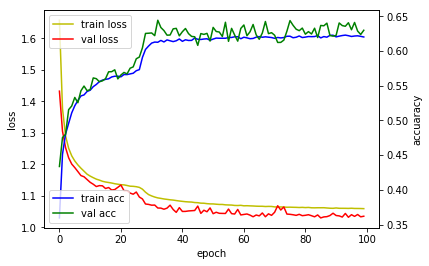

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(custom_hist.train_loss, 'y', label = 'train loss')
loss_ax.plot(custom_hist.val_loss, 'r', label = 'val loss')

acc_ax.plot(custom_hist.train_acc, 'b', label = 'train acc')
acc_ax.plot(custom_hist.val_acc, 'g', label = 'val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuaracy')

loss_ax.legend(loc = 'upper left')
acc_ax.legend(loc = 'lower left')